# Classification ML Model NB.

In [33]:
# Data manipulation.
import pandas as pd
import numpy as np

# Data Preparation.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Class balancing.
from imblearn.over_sampling import SMOTE

# ML models.
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

# Metrics.
from sklearn.metrics import auc, confusion_matrix, f1_score, precision_score, recall_score, roc_curve, accuracy_score

# Hyperparameter tunning.
from sklearn.model_selection import RandomizedSearchCV

# Model export.
import joblib

# Plots
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px

pd.set_option('display.max_columns', None)

# Loading Data

In [2]:
path_processed_data = '../data/processed/'
file_name = 'challenge_processed.csv'

data = pd.read_csv(path_processed_data + file_name, index_col=0)
data.sample()

,materia_aprobada,nota_final_materia,periodo_1-2022,integrador,primer_parcial,recuperatorio_primer_parcial,recuperatorio_segundo_parcial,segundo_parcial,evaluacion_diagnostica,api1,api1_score,api1_time_to_submit[days],api2,api2_score,api2_time_to_submit[days],api3,api3_score,api3_time_to_submit[days],api4,api4_score,api4_time_to_submit[days],ed3,ed3_score,ed3_time_to_submit[days],ed4,ed4_score,ed4_time_to_submit[days],otros_trabajos,otros_trabajos_score,tp1,tp1_score,tp1_time_to_submit[days],tp2,tp2_score,tp2_time_to_submit[days],tp3,tp3_score,tp3_time_to_submit[days],tp4,tp4_score,tp4_time_to_submit[days],basic_lti_launch_submits,discussion_topic_submits,external_tool_submits,media_recording_submits,online_quiz_submits,online_text_entry_submits,online_upload_submits
3d9a24d8-787d-46a1-a594-5bec5ed54f34/a5203855-08da-4f17-8931-48115e78b1c9,1,10.0,1,-1,9,-1,-1,10,-1,1,80.0,0.0,1,100.0,0.0,1,100.0,0.0,1,100.0,0.0,-1,0.0,-1.0,-1,0.0,-1.0,0,0.0,1,72.5,0.0,1,88.33,0.0,1,85.0,0.0,1,80.0,0.0,0,0,4,0,4,0,0


In [3]:
# Droping un-useful columns.
data.drop(columns=['nota_final_materia'], inplace=True)

In [4]:
# Selecting features and target variable.
X = data.drop(columns='materia_aprobada')
y = data['materia_aprobada']

# Random State.
rnd_st = 13

Checking if target class is unbalanced

In [5]:
print(f'Sample size: {len(data)}')
y.value_counts(normalize=True)

Sample size: 2758


1    0.973894
0    0.026106
Name: materia_aprobada, dtype: float64

Here we can see that target class is heavily unbalanced, so one technique i can apply in order to improve model performance is class balancing. Ill try to use oversample,undersample, and / or class weighting.

# Dataset preparation.
Im going to prepare the dataset in order to train my ML model, im going to:

- Divide my data into train and test.
- Normalize numerical data.
- Balance target class.

## Dividing data into train and test.

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=rnd_st, test_size=0.3)

## Normalizing data.

In [7]:
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

## Balancing target class.

Balancing techniques are employed to address imbalanced classes within the dataset. Imbalanced datasets occur when one class has significantly fewer samples than another, and this can lead to biased model training and poor performance, especially for the minority class.

In this exercise im going to apply Oversample, this is due to the fact that the target class is heavily underbalanced, so if i apply undersample the leftover will be a really small dataset. 

In [8]:
smote = SMOTE(random_state=rnd_st)
X_train_sc_ovrsmpl, y_train_ovrsmpl = smote.fit_resample(X_train_sc, y_train)

y_train_ovrsmpl.value_counts()

1    1880
0    1880
Name: materia_aprobada, dtype: int64

# Model training and evaluation.
Now im going to train different classification models:

- Logistic Regression.
- Random Forest.
- Gradient Boosting (XGBoost).

After training the different models im going to evaluate the performance of them by using some metrics, and AUC / ROC curves. 

## Model training. 

In [9]:
def fit_train_model (X_train, X_test, y_train, model = 'lr'):
    """
    Fit and train a classification model on the given training data and make predictions on both
    the training and test datasets.

    Parameters:
    - X_train (array-like): Training features.
    - X_test (array-like): Test features.
    - y_train (array-like): Training labels.
    - model (str, default='lr'): Type of classification model to use. Options include:
        - 'lr': Logistic Regression
        - 'rf': Random Forest Classifier
        - 'xgb': XGBoost Classifier

    Returns:
    - y_pred_train (array): Predicted labels for the training set.
    - y_pred_train_proba (array): Predicted probabilities for each class on the training set.
    - y_pred_test (array): Predicted labels for the test set.
    - y_pred_test_proba (array): Predicted probabilities for each class on the test set.

    Notes:
    - For 'lr' (Logistic Regression):
        - Default parameters are used, but can be modified within the function.
    - For 'rf' (Random Forest Classifier):
        - Default parameters are used, but can be modified within the function.
    - For 'xgb' (XGBoost Classifier):
        - Baseline parameters are used, but can be modified within the function.
          These parameters are suitable for binary classification problems.

    Example:
    ```python
    X_train, X_test, y_train = load_data()
    y_pred_train, y_pred_train_proba, y_pred_test, y_pred_test_proba = fit_train_model(X_train, X_test, y_train, model='rf')
    ```
    """
    if model == 'lr':
        # These parameters can be modified, i found that they are the ones
        # that perform the best.
        model = LogisticRegression(
            penalty='l2',
            fit_intercept=True,
            class_weight=None,
            random_state=rnd_st,
            solver='liblinear',
            max_iter=150,
            verbose=0
        )

        model.fit(X_train, y_train)
    
    if model == 'rf':
        model = RandomForestClassifier(
            n_estimators=150,
            criterion='gini', # {“gini”, “entropy”, “log_loss”}
            max_depth=None,
            max_features= None, # {“sqrt”, “log2”, None}
            n_jobs=-1,
            random_state=rnd_st,
            verbose=0,
            class_weight=None
        )

        model.fit(X_train, y_train)
    
    if model == 'xgb':
        # baseline parameters
        baseline_params = {
            'objective': 'binary:logistic',  # Binary classification problem
            'eval_metric': 'logloss',         # Logarithmic loss for evaluation
            'eta': 0.3,                       # Learning rate
            'max_depth': 6,                   # Maximum depth of a tree
            'min_child_weight': 1,            # Minimum sum of instance weight needed in a child
            'subsample': 1.0,                 # Fraction of observations to be randomly sampled for each boosting round
            'colsample_bytree': 1.0,          # Fraction of features to be randomly sampled for each boosting round
            'gamma': 0,                       # Minimum loss reduction required to make a further partition on a leaf node
            'lambda': 1,                      # L2 regularization term on weights
            'alpha': 0,                       # L1 regularization term on weights
            'scale_pos_weight': 1,            # Controls the balance of positive and negative weights
            'n_estimators': 100,              # Number of boosting rounds (trees)
            'seed': rnd_st                         # Random seed for reproducibility
        }

        model = XGBClassifier(**baseline_params)

        model.fit(X_train, y_train)
        
    # Predicting train data.
    y_pred_train = model.predict(X_train)
    y_pred_train_proba = model.predict_proba(X_train)
    
    # Predicting test data.
    y_pred_test = model.predict(X_test)
    y_pred_test_proba = model.predict_proba(X_test)
    
    return y_pred_train, y_pred_train_proba, y_pred_test, y_pred_test_proba

### Unbalanced Dataset.

#### Logistic Regression.

In [10]:
y_pred_train_lr, y_pred_train_lr_proba, y_pred_test_lr, y_pred_test_lr_proba = \
    fit_train_model(X_train_sc, X_test_sc, y_train,model='lr')

#### Random Forest.

In [11]:
y_pred_train_rf, y_pred_train_rf_proba, y_pred_test_rf, y_pred_test_rf_proba = \
    fit_train_model(X_train_sc, X_test_sc, y_train,model='rf')

#### XGBoost.

In [12]:
y_pred_train_xgb, y_pred_train_xgb_proba, y_pred_test_xgb, y_pred_test_xgb_proba = \
    fit_train_model(X_train_sc, X_test_sc, y_train,model='xgb')

### Balanced Dataset.

#### Logistic Regression.

In [13]:
y_pred_train_ovrsmpl_lr, y_pred_train_ovrsmpl_lr_proba, y_pred_test_ovrsmpl_lr, y_pred_test_ovrsmpl_lr_proba = \
    fit_train_model(X_train_sc_ovrsmpl, X_test_sc, y_train_ovrsmpl,model='lr')

#### Random Forest.

In [14]:
y_pred_train_ovrsmpl_rf, y_pred_train_ovrsmpl_rf_proba, y_pred_test_ovrsmpl_rf, y_pred_test_ovrsmpl_rf_proba = \
    fit_train_model(X_train_sc_ovrsmpl, X_test_sc, y_train_ovrsmpl,model='rf')

#### XGBoost.

In [15]:
y_pred_train_ovrsmpl_xgb, y_pred_train_ovrsmpl_xgb_proba, y_pred_test_ovrsmpl_xgb, y_pred_test_ovrsmpl_xgb_proba = \
    fit_train_model(X_train_sc_ovrsmpl, X_test_sc, y_train_ovrsmpl,model='xgb')

## Model Evaluation.

In [16]:
def model_metrics(y_train, y_pred_train, y_pred_train_proba, y_test, y_pred_test, y_pred_test_proba, plot_conf_mat=True):
    """
    Calculate and display various classification metrics for both training and test datasets.
    
    Parameters:
    - y_train (array-like): True labels for the training set.
    - y_pred_train (array-like): Predicted labels for the training set.
    - y_pred_train_proba (array-like): Predicted probabilities for each class on the training set.
    - y_test (array-like): True labels for the test set.
    - y_pred_test (array-like): Predicted labels for the test set.
    - y_pred_test_proba (array-like): Predicted probabilities for each class on the test set.
    - plot_conf_mat (bool, default=True): If True, plot the confusion matrix for the test set.

    Returns:
    - data_result (DataFrame): DataFrame containing accuracy, recall, precision, specificity, F1-score,
      and AUC for both the training and test datasets.
    """
    # ---METRICS TRAIN---
    # Confusion matrix with training data.
    conf_matrix_train = confusion_matrix(y_train, y_pred_train)
    
    # Extract TN, FP, FN, TP from the confusion matrix for training.
    tn_train, fp_train, fn_train, tp_train = conf_matrix_train.ravel()
    
    # Calculate metrics for training.
    acc_score_train = np.round(accuracy_score(y_train, y_pred_train), 4)
    rec_score_train = np.round(recall_score(y_train, y_pred_train), 4)
    prec_score_train = np.round(precision_score(y_train, y_pred_train), 4)
    spec_score_train = np.round((tn_train / (tn_train + fp_train)), 4)
    f_score_train = np.round(f1_score(y_train, y_pred_train), 4)
    
    fpr_log_train, tpr_log_train, thr_log_train = roc_curve(y_train, y_pred_train_proba[:, 1])
    auc_score_train = np.round(auc(fpr_log_train, tpr_log_train), 4)
    
    # ---METRICS TEST---
    conf_matrix_test = confusion_matrix(y_test, y_pred_test)
    
    tn_test, fp_test, fn_test, tp_test = conf_matrix_test.ravel()
    
    acc_score_test = np.round(accuracy_score(y_test, y_pred_test), 4)
    rec_score_test = np.round(recall_score(y_test, y_pred_test), 4)
    prec_score_test = np.round(precision_score(y_test, y_pred_test), 4)
    spec_score_test = np.round((tn_test / (tn_test + fp_test)), 4)
    f_score_test = np.round(f1_score(y_test, y_pred_test), 4)
    
    fpr_log_test, tpr_log_test, thr_log_test = roc_curve(y_test, y_pred_test_proba[:, 1])
    auc_score_test = np.round(auc(fpr_log_test, tpr_log_test), 4)
    
    # Create a DataFrame with two rows (training and test) and six columns for the metrics.
    data_df = [
        [acc_score_train, rec_score_train, prec_score_train, spec_score_train, f_score_train, auc_score_train],
        [acc_score_test, rec_score_test, prec_score_test, spec_score_test, f_score_test, auc_score_test]
    ]
    
    # Define column names.
    columns_df = ['Accuracy', 'Recall', 'Precision', 'Specificity', 'F1-Score', 'AUC']

    # Create DataFrame.
    data_result = pd.DataFrame(data_df, columns=columns_df, index=['Metrics Train', 'Metrics Test'])
    
    # If specified, plot the confusion matrix for the test set.
    if plot_conf_mat:
        sns.heatmap(conf_matrix_test, annot=True, fmt='d', cbar=False, cmap="YlGnBu")
        plt.xlabel('Predicted Values')
        plt.ylabel('True Values')
    
    # Return the DataFrame with the metrics.
    return data_result

### Unbalanced Dataset.

#### Logistic Regression.

,Accuracy,Recall,Precision,Specificity,F1-Score,AUC
Metrics Train,0.9741,0.9968,0.9771,0.1200,0.9868,0.9509
Metrics Test,0.9650,0.9901,0.9744,0.0455,0.9822,0.8552


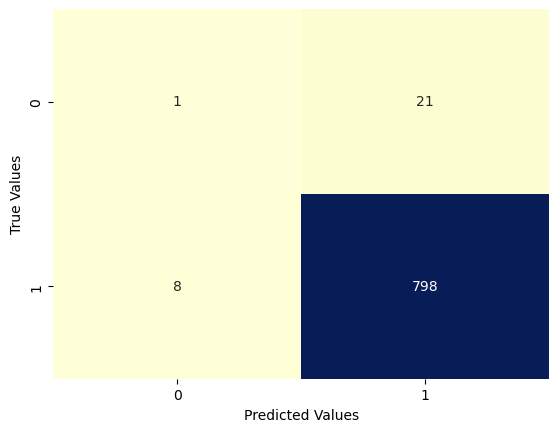

In [17]:
data_result = model_metrics(
    y_train,
    y_pred_train_lr,
    y_pred_train_lr_proba,
    y_test,
    y_pred_test_lr,
    y_pred_test_lr_proba,
    plot_conf_mat=True
)
data_result

#### Random Forest.

,Accuracy,Recall,Precision,Specificity,F1-Score,AUC
Metrics Train,1.0000,1.0000,1.0000,1.0,1.0000,1.0000
Metrics Test,0.9722,0.9988,0.9734,0.0,0.9859,0.8871


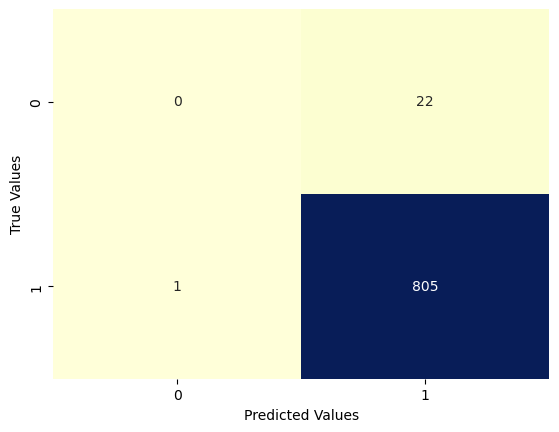

In [18]:
data_result = model_metrics(
    y_train,
    y_pred_train_rf,
    y_pred_train_rf_proba,
    y_test,
    y_pred_test_rf,
    y_pred_test_rf_proba,
    plot_conf_mat=True
)
data_result

#### XGBoost.

,Accuracy,Recall,Precision,Specificity,F1-Score,AUC
Metrics Train,1.0000,1.0000,1.000,1.0000,1.0000,1.0000
Metrics Test,0.9722,0.9938,0.978,0.1818,0.9858,0.9375


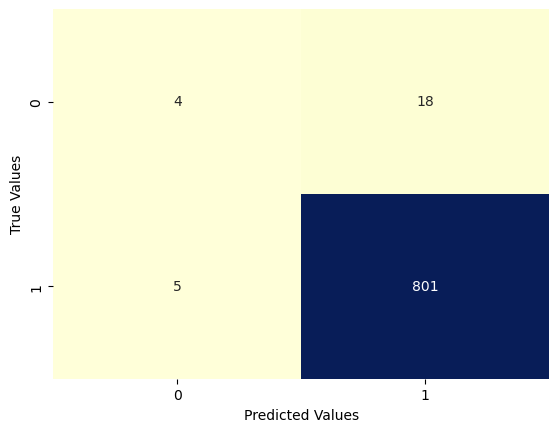

In [19]:
data_result = model_metrics(
    y_train,
    y_pred_train_xgb,
    y_pred_train_xgb_proba,
    y_test,
    y_pred_test_xgb,
    y_pred_test_xgb_proba,
    plot_conf_mat=True
)
data_result

### Balanced Dataset.

#### Logistic Regression.

,Accuracy,Recall,Precision,Specificity,F1-Score,AUC
Metrics Train,0.9455,0.9080,0.9816,0.9830,0.9434,0.9676
Metrics Test,0.8829,0.8908,0.9876,0.5909,0.9367,0.8108


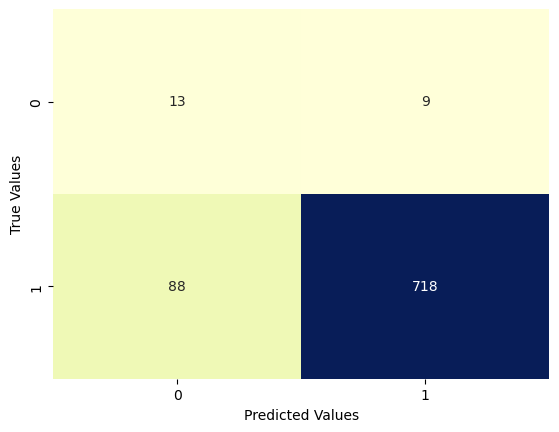

In [20]:
data_result = model_metrics(
    y_train_ovrsmpl, 
    y_pred_train_ovrsmpl_lr,
    y_pred_train_ovrsmpl_lr_proba,
    y_test,
    y_pred_test_ovrsmpl_lr,
    y_pred_test_ovrsmpl_lr_proba,
    plot_conf_mat=True
)
data_result

#### Random Forest.

,Accuracy,Recall,Precision,Specificity,F1-Score,AUC
Metrics Train,1.000,1.0000,1.0000,1.0000,1.000,1.0000
Metrics Test,0.965,0.9814,0.9826,0.3636,0.982,0.9079


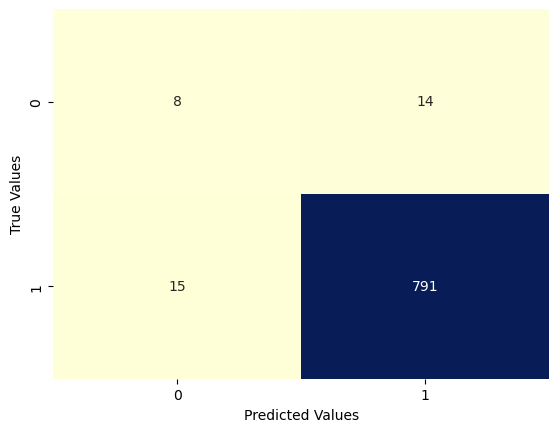

In [21]:
data_result = model_metrics(
    y_train_ovrsmpl, 
    y_pred_train_ovrsmpl_rf, 
    y_pred_train_ovrsmpl_rf_proba, 
    y_test, 
    y_pred_test_ovrsmpl_rf, 
    y_pred_test_ovrsmpl_rf_proba, 
    plot_conf_mat=True
)
data_result

#### XGBoost.

,Accuracy,Recall,Precision,Specificity,F1-Score,AUC
Metrics Train,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
Metrics Test,0.9686,0.9839,0.9839,0.4091,0.9839,0.9233


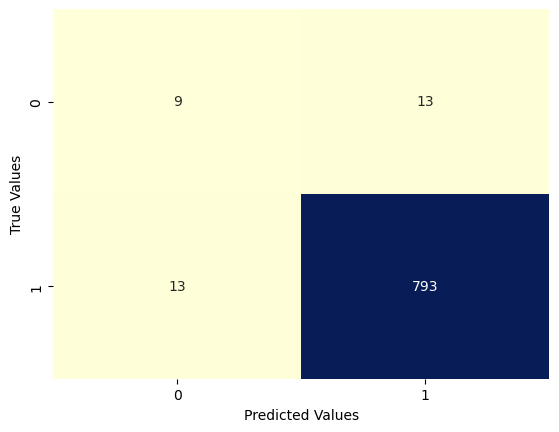

In [22]:
data_result = model_metrics(
    y_train_ovrsmpl, 
    y_pred_train_ovrsmpl_xgb, 
    y_pred_train_ovrsmpl_xgb_proba, 
    y_test, 
    y_pred_test_ovrsmpl_xgb, 
    y_pred_test_ovrsmpl_xgb_proba,
    plot_conf_mat=True
)
data_result

When reviewing different models performance, we can observe that base models struggle in predicting the negative class (the one that is heavily unbalanced), that why specificity value is really low. This is cause by the imbalance in the target class.

Applying oversample seems to have improved the model specificity, best model that has biggest specificity value is Logistic Regression with Oversample, but if we look close its also the one that has the biggest value of false negatives.

All remaining models are really good in predicting the positive class (when a student approves a course).

In this exercise the most important scenario will be to detect if a student fails a course. So ill keep the best performing model and try to improve the predictions of negative class.

In order to select the best performing model ill compare all models, using ROC curve. Its a graphical representation for evaluating the performance of a binary classification model.

What ill analyze in the curve is how the true positive rate (tpr) and false positive rate (fpr) change with different classification thresholds. This is crucial when selecting an appropriate threshold, so i can evaluate the trade-off between sensitivity and specificity.

In [23]:
def roc_curves(values, return_threshold_df = False):
    """
    Plot ROC curves for multiple models.

    Parameters:
    - values (list): A list of models in the format [ [y_test, y_test_probas, label], [x, x, x] ].
      Each model is represented by a list containing:
        - y_test (array-like): True labels for the test set.
        - y_test_probas (array-like): Predicted probabilities for each class on the test set.
        - label (str): Label for the model in the graph.
    - return_threshold (boolean): Return a DF with all metrics (fpr, tpr, and threshold), this is useful
      to modify the threshold of a model.

    Returns:
    - Displays the ROC curves using Plotly Express.
    _ Threshold DataFrame in which we are going to be able to obtain the desired threshold.

    Example:
    ```python
    roc_curves([
        [y_test1, y_pred_probas1, 'Model 1'],
        [y_test2, y_pred_probas2, 'Model 2'],
        [y_test3, y_pred_probas3, 'Model 3']
    ])
    ```
    """
    # Initialize an empty DataFrame.
    data_fun = pd.DataFrame(columns=['tpr', 'fpr', 'threshold', 'Model'])

    # Iterate over different models.
    for i in values:
        # Index 0 corresponds to y_test.
        y_test_fun = i[0]

        # Index 1 corresponds to y_pred_proba.
        y_pred_probas_fun = i[1]

        # Index 2 corresponds to the label in the plot.
        label = i[2]

        # Obtain the False Positive Rate (fpr) and True Positive Rate (tpr) for the model.
        fpr, tpr, thr = roc_curve(y_test_fun, y_pred_probas_fun[:, 1])

        # Create a DataFrame to store data for one iteration of the loop.
        loop_df = pd.DataFrame({'tpr': tpr, 'fpr': fpr, 'threshold' : thr,'Model': label})

        # Add the data from one iteration of the loop to the main DataFrame.
        data_fun = pd.concat([data_fun, loop_df], ignore_index=True)

    # Plot the ROC curves for different models.
    fig = px.line(data_fun, x='fpr', y='tpr', color='Model', title='ROC curve')
    fig.update_layout(height=650, width=1000)
    fig.show()
    
    if return_threshold_df:
        return data_fun

In [24]:
models = [
    [y_test, y_pred_test_lr_proba, 'Logistic Regression - Unbalanced'],
    [y_test, y_pred_test_rf_proba, 'Random Forest - Unbalanced'],
    [y_test, y_pred_test_xgb_proba, 'XGBoost - Unbalanced'],
    [y_test, y_pred_test_ovrsmpl_lr_proba, 'Logistic Regression - Balanced'],
    [y_test, y_pred_test_ovrsmpl_rf_proba, 'Random Forest - Balanced'],
    [y_test, y_pred_test_ovrsmpl_xgb_proba, 'XGBoost - Balanced']
]

threshold_df = roc_curves(values=models, return_threshold_df=True)

The best performing model is, as expected, xgboost.

Even tho the base model perform well as it is, ill try to adjust the hyperparameters so i can boost its performance a little bit more. 

In [25]:
tpr_mask = (threshold_df['tpr'] > 0.93) & (threshold_df['tpr'] < 0.94)
fpr_mask = (threshold_df['fpr'] > 0.18) & (threshold_df['fpr'] < 0.19)
model_mask = threshold_df['Model'] == 'XGBoost - Balanced'

threshold_df[model_mask & tpr_mask & fpr_mask]

,tpr,fpr,threshold,Model
502,0.939206,0.181818,0.989662,XGBoost - Balanced


# Threshold modification.

Based on the previous results, we can see that the point on the curve closer to the top-left corner which indicates a better trade-off has a threshold of 98%, this would mean that we are prioritizing high sensitivity in order to catch as many true negatives as possible, at the cost of more false positives.

Im going to compare this model to the one that i consider the best from the previous ones.

,Accuracy,Recall,Precision,Specificity,F1-Score,AUC
Metrics Train,0.9822,0.9644,1.0000,1.0000,0.9819,1.0000
Metrics Test,0.9348,0.9380,0.9947,0.8182,0.9655,0.9233


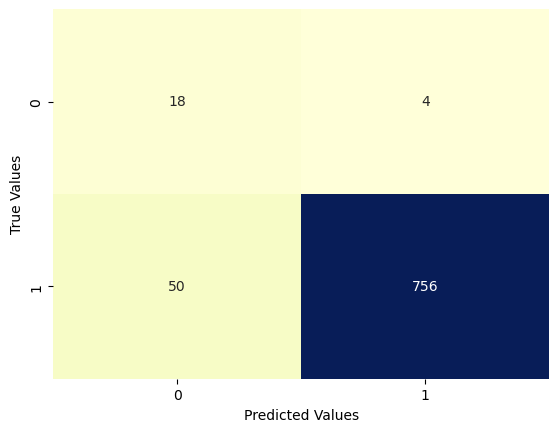

In [26]:
# Training xgb with same hyperparameters as before.
# baseline parameters
baseline_params = {
    'objective': 'binary:logistic',  # Binary classification problem
    'eval_metric': 'logloss',         # Logarithmic loss for evaluation
    'eta': 0.3,                       # Learning rate
    'max_depth': 6,                   # Maximum depth of a tree
    'min_child_weight': 1,            # Minimum sum of instance weight needed in a child
    'subsample': 1.0,                 # Fraction of observations to be randomly sampled for each boosting round
    'colsample_bytree': 1.0,          # Fraction of features to be randomly sampled for each boosting round
    'gamma': 0,                       # Minimum loss reduction required to make a further partition on a leaf node
    'lambda': 1,                      # L2 regularization term on weights
    'alpha': 0,                       # L1 regularization term on weights
    'scale_pos_weight': 1,            # Controls the balance of positive and negative weights
    'n_estimators': 100,              # Number of boosting rounds (trees)
    'seed': rnd_st                         # Random seed for reproducibility
}

model_custom_thresh = XGBClassifier(**baseline_params)
model_custom_thresh.fit(X_train_sc_ovrsmpl, y_train_ovrsmpl)

# Obtaining predicted probabilities.
y_pred_train_proba = model_custom_thresh.predict_proba(X_train_sc_ovrsmpl)
y_pred_test_proba = model_custom_thresh.predict_proba(X_test_sc)

# Setting custom threshold
custom_thresh = threshold_df.loc[model_mask & tpr_mask & fpr_mask, 'threshold'].values[0]

# Applying custom threshold to convert probabilities for the positive class.
y_pred_train_custom_tresh = (y_pred_train_proba[:,1] > custom_thresh).astype(int)
y_pred_test_custom_thresh = (y_pred_test_proba[:,1] > custom_thresh).astype(int)

# Evaluating model.
data_result = model_metrics(
    y_train_ovrsmpl,
    y_pred_train_custom_tresh,
    y_pred_train_proba,
    y_test,
    y_pred_test_custom_thresh,
    y_pred_test_proba,
    plot_conf_mat=True
)
data_result

Here we can see that the model detected more cases as True Negatives but False Negatives almost quadrupled.

But by looking at metrics we can see that Precision and specificity were improved, but the other metrics lowered their values.

I believe that the tradeoff in this case are good, and modifying the threshold can improve model performance to detect the negative class.

# Model tunning.

Last thing to do is to check different combination of hyperparameters to see if i can improve the model a bit more.

Ill use Randomized Search to consider different combinations of hyperparameters, by cross-validating these combinations, im going to be able to identify the set that maximizes models performance.

The score ill use to select the best model will be the area under the ROC curve (AUC value).

In [27]:
# Parameter grid including all hyperparameters
param_grid = {
    'objective': ['binary:logistic'],
    'eval_metric': ['logloss', 'auc', 'error'],  # Include other possible options
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5, 6],
    'min_child_weight': [1, 2, 3],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2],
    'lambda': [0.1, 1, 10],
    'alpha': [0.1, 1, 10],
    'scale_pos_weight': [1, 2, 3],
    'seed': [rnd_st]
}

# Create an XGBoost classifier
xgb_model_gs = XGBClassifier()

# Create GridSearchCV object
grid_search = RandomizedSearchCV(estimator=xgb_model_gs, param_distributions=param_grid, n_iter=100, scoring='roc_auc', cv=5, verbose=0, error_score='raise', random_state=rnd_st)

# Fit the model to the data
grid_search.fit(X_train_sc_ovrsmpl, y_train_ovrsmpl)

print("Best Parameters: ", grid_search.best_params_)
print("Best AUC Score: ", grid_search.best_score_)

Best Parameters:  {'subsample': 0.9, 'seed': 13, 'scale_pos_weight': 2, 'objective': 'binary:logistic', 'n_estimators': 200, 'min_child_weight': 1, 'max_depth': 3, 'learning_rate': 0.1, 'lambda': 1, 'gamma': 0, 'eval_metric': 'auc', 'colsample_bytree': 0.8, 'alpha': 0.1}
Best AUC Score:  0.999588331824355


,Accuracy,Recall,Precision,Specificity,F1-Score,AUC
Metrics Train,0.9992,1.0000,0.9984,0.9984,0.9992,1.0000
Metrics Test,0.9710,0.9864,0.9839,0.4091,0.9851,0.9532


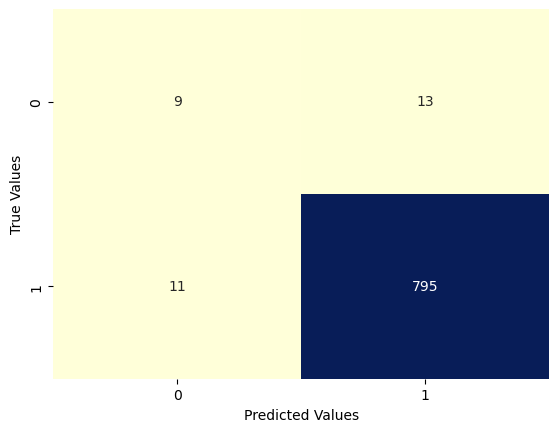

In [28]:
# Obtaining metrics.
# Keeping best performing model.
best_model_gs = grid_search.best_estimator_

# Obtaining predicted probabilities.
y_pred_train_proba = best_model_gs.predict_proba(X_train_sc_ovrsmpl)
y_pred_test_proba = best_model_gs.predict_proba(X_test_sc)

y_pred_train = best_model_gs.predict(X_train_sc_ovrsmpl)
y_pred_test = best_model_gs.predict(X_test_sc)

# Evaluating model.
data_result = model_metrics(
    y_train_ovrsmpl,
    y_pred_train,
    y_pred_train_proba,
    y_test,
    y_pred_test,
    y_pred_test_proba,
    plot_conf_mat=True
)
data_result

This model performance is very similar to the baseline, except here we got to reduce by two the false negatives.

But still we are not getting the same amount of True Positives as the model in which i modified the threshold.

Ill try to modify the threshold of this model, and compare it with baseline + threshold modification.

,Accuracy,Recall,Precision,Specificity,F1-Score,AUC
Metrics Train,0.9524,0.9048,1.0000,1.0000,0.9500,1.0000
Metrics Test,0.8937,0.8945,0.9959,0.8636,0.9425,0.9532


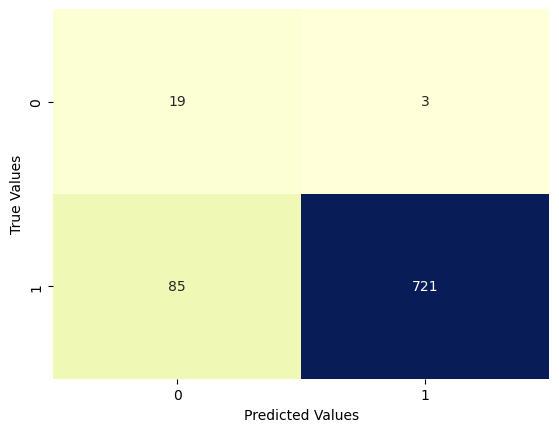

In [29]:
# Modifying threshold.
best_model_gs.threshold_ = custom_thresh

# Obtaining predicted probabilities.
y_pred_train_proba = best_model_gs.predict_proba(X_train_sc_ovrsmpl)
y_pred_test_proba = best_model_gs.predict_proba(X_test_sc)

# Applying custom threshold to convert probabilities for the positive class.
y_pred_train_custom_tresh = (y_pred_train_proba[:,1] > custom_thresh).astype(int)
y_pred_test_custom_thresh = (y_pred_test_proba[:,1] > custom_thresh).astype(int)

# Evaluating model.
data_result = model_metrics(
    y_train_ovrsmpl,
    y_pred_train_custom_tresh,
    y_pred_train_proba,
    y_test,
    y_pred_test_custom_thresh,
    y_pred_test_proba,
    plot_conf_mat=True
)
data_result

From here we can see that after gridsearch and threshold modification we were able to reduce the False Positives by one, but that improvement bring with it 35 more False Negatives.

By checking the metrics, seeing that only the specificity and the AUC went slightly up, and based on the increment of False Negatives, im going to decide that the best performing model is the one with baseline hyperparameters and threshold modification.

# Exporting best performing model.

Next im going to export the best performing model for later use.

Since the best performing model needs a threshold modification, i cant export with that modification, so ill export the trained model.

The threshold modification will be done when this model is used for predictions.

In [30]:
best_model = model_custom_thresh
best_params_dict = baseline_params

In [31]:
# Saving the trained model to a file using joblib.
joblib.dump(best_model, '../trained_model/trained_classification_model.joblib')

['../trained_model/trained_classification_model.joblib']

In [32]:
# Write the best parameters to the file
with open('../docker/app/best_params.txt', 'w') as file:
    for param, value in best_params_dict.items():
        file.write(f"{param}: {value}\n")